#### Problem Statement:
Yulu has recently suffered some revenue loses. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

We have to analyse which factors are significant in predicting the demand for shared electric cycles in the Indian market and by how much. We need to recommend the optimized way to improve the business revenue and drive up the profits

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [8]:
# no of rows amd columns in dataset
print(f"rows count: {df.shape[0]} \n columns count: {df.shape[1]}")

rows count: 10886 
 columns count: 12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Changing data type of columns

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [11]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


* There are no missing values in the dataset.
* "casual" and "registered" attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

In [12]:
# detecting missing values in the dataset
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in dataset

In [13]:
# minimum datetime and maximum datetime
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [14]:
# number of unique values in each categorical columns
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

### Univariate Analysis

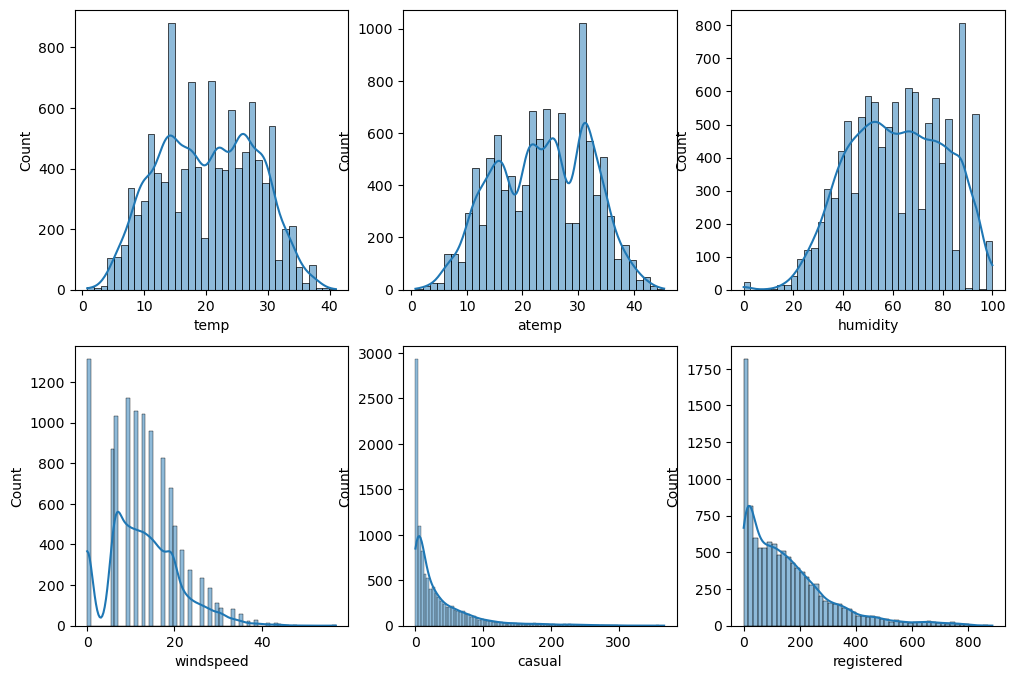

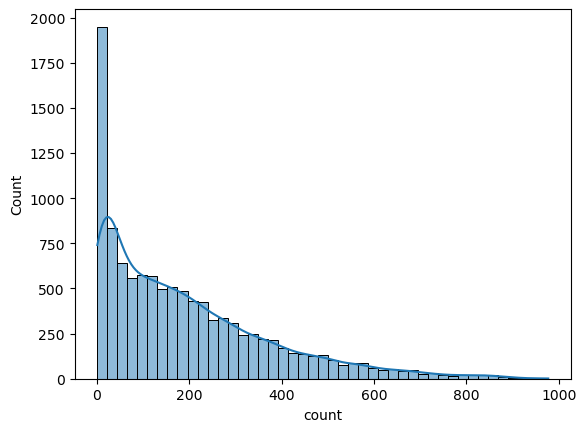

In [18]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(df[num_cols[-1]], kde=True) 
plt.show()

* casual, registered and count somewhat looks like Log Normal Distrinution
* temp, atemp and humidity looks like they follows the Normal Distribution
* windspeed follows the binomial distribution

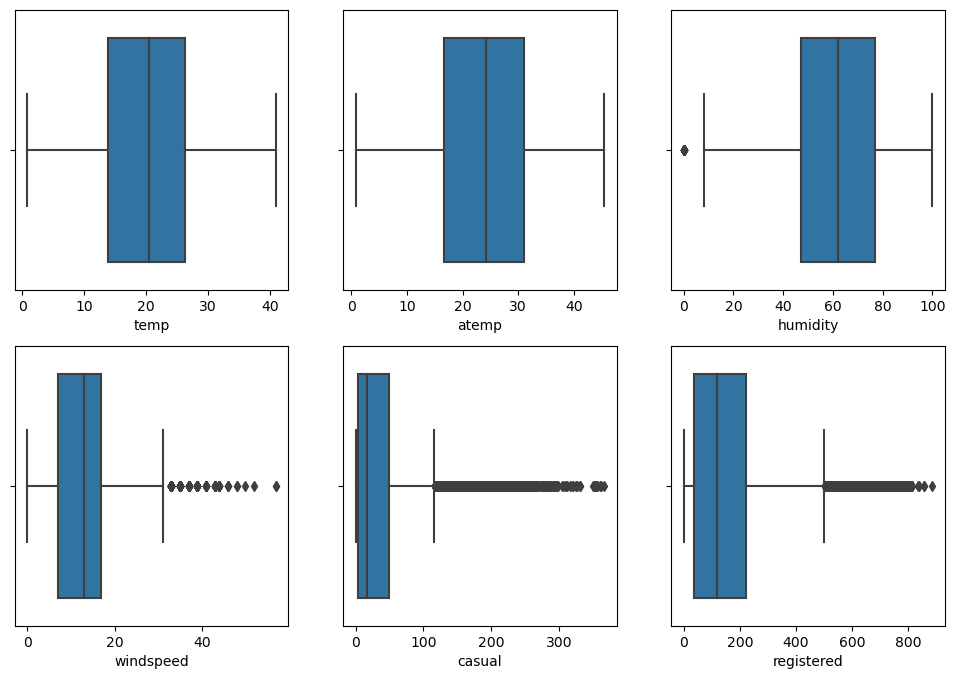

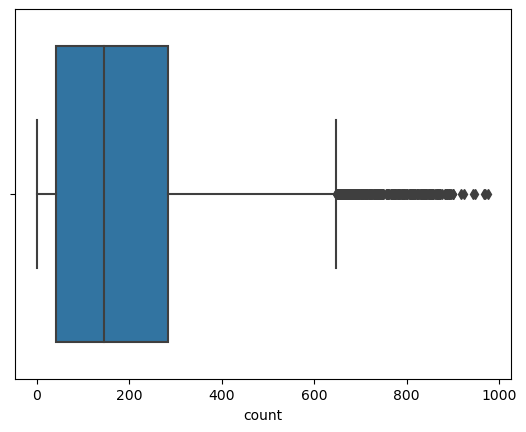

In [17]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]]) 
plt.show()

Possibly humidity, casual, registered and count have outliers in the data.

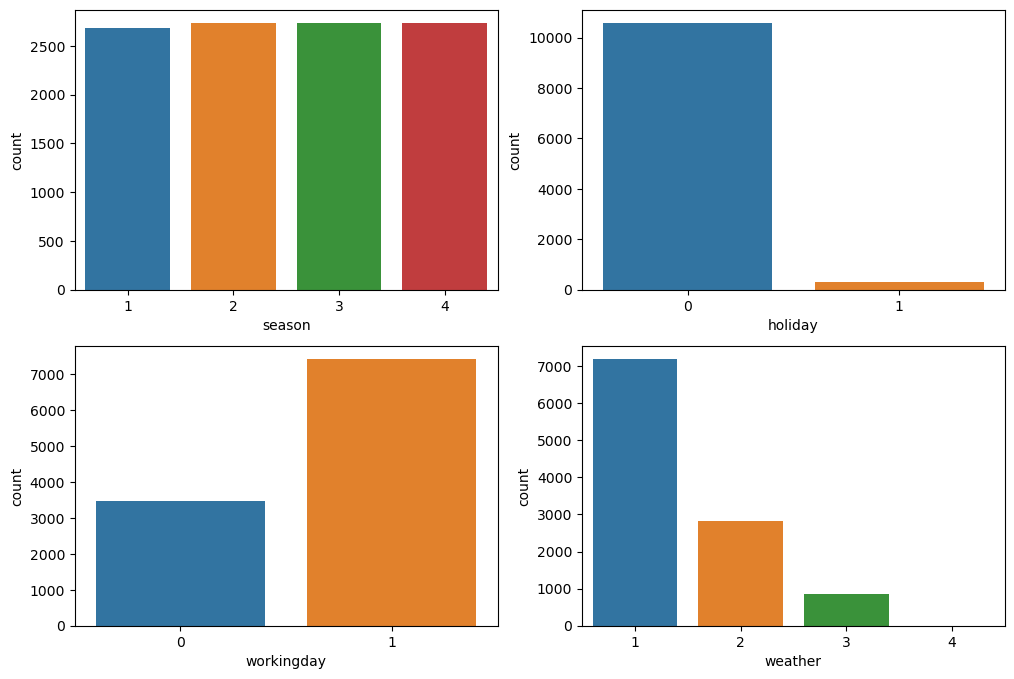

In [20]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

### Bi-variate Analysis

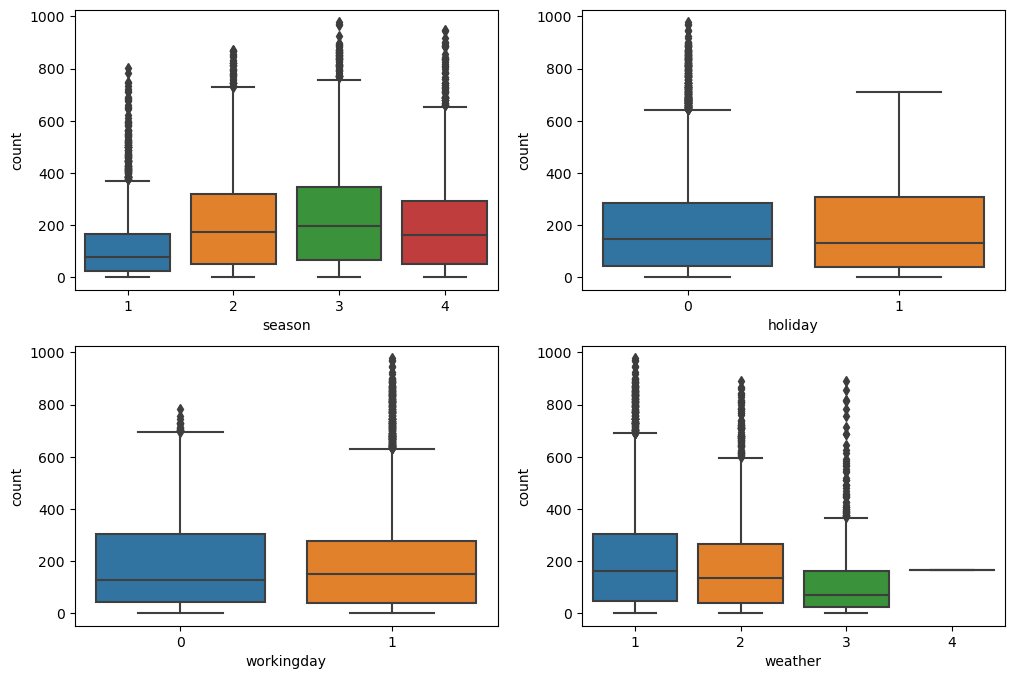

In [24]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

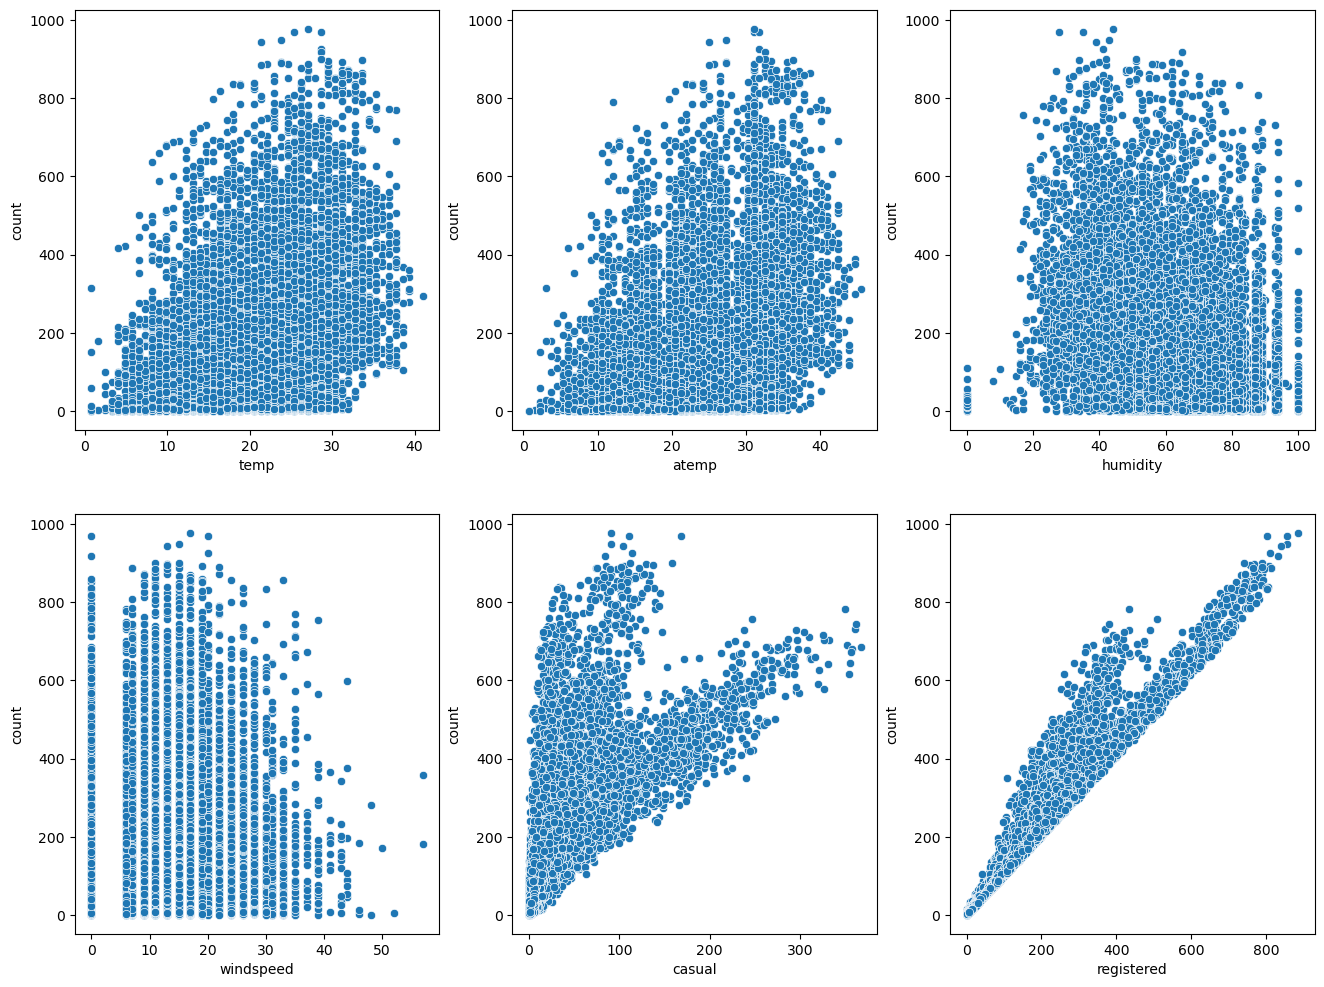

In [25]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

In [26]:
# understanding the correlation between count and numerical variables 
df.corr()['count']

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

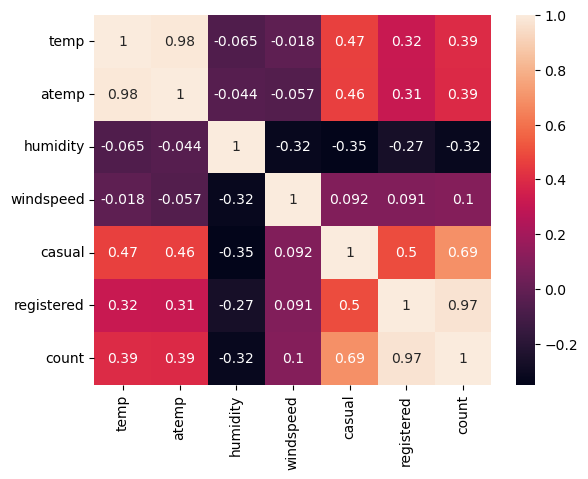

In [27]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Hypothesis Testing - 1

<b>Null Hypothesis (H0):</b>  Weather is independent of the season

<b>Alternate Hypothesis (H1):</b> Weather is not independent of the season

<b> Significance level (alpha):</b> 0.05

We will use <b>chi-square test</b> to test hypyothesis defined above

In [28]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [29]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [31]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.


### Hypothesis Testing - 2
<b>Null Hypothesis: </b> Working day has no effect on the number of cycles being rented.

<b>Alternate Hypothesis:</b> Working day has effect on the number of cycles being rented.

<b>Significance level (alpha):</b> 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

In [32]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [33]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

### Hypothesis Testing - 3
Null Hypothesis: Number of cycles rented is similar in different weather and season.

Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

Significance level (alpha): 0.05

Here, we will use the ANOVA to test the hypothess defined above

In [34]:
# defining the data groups for the ANOVA

gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

#### Insights
- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.
#### Recommendations
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
